# **Installing Proper Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
!pip install squarify
!pip install lifetimes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00


In [ ]:
import os
import datetime
import squarify
import warnings
import datetime as dt
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.metrics import (silhouette_score,
                             calinski_harabasz_score,
                             davies_bouldin_score)
from lifetimes import BetaGeoFitter, GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
palette = 'Set2'

# **File Reading**

In [ ]:
df = pd.read_csv('/content/sample_data/online_retail.csv', encoding="ISO-8859-1")

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


# **Informations About Dataset**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.00,1.00,3.0,10.00,80995.0
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0
Customer ID,824364.0,15324.638504,1697.464450,12346.00,13975.00,15255.0,16797.00,18287.0


In [ ]:
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70,'-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'-'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'-'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'-'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'-'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(70,'-'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(70,'-'))
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_data(df)

------------------------------- SHAPE --------------------------------
Rows: 1067371
Columns: 8
------------------------------- TYPES --------------------------------
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object
-------------------------------- HEAD --------------------------------
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:0

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
Invoice,1067371,53628,537434,1350
StockCode,1067371,5305,85123A,5829
Description,1062989,5698,WHITE HANGING HEART T-LIGHT HOLDER,5918
InvoiceDate,1067371,47635,2010-12-06 16:57:00,1350
Country,1067371,43,United Kingdom,981330


# **Converting Objects To Categorical Variables**

In [ ]:
obj_list=list(df.select_dtypes(['object']).columns)
for colname in obj_list:
    df[colname]=df[colname].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   Invoice      1067371 non-null  category
 1   StockCode    1067371 non-null  category
 2   Description  1062989 non-null  category
 3   Quantity     1067371 non-null  int64   
 4   InvoiceDate  1067371 non-null  category
 5   Price        1067371 non-null  float64 
 6   Customer ID  824364 non-null   float64 
 7   Country      1067371 non-null  category
dtypes: category(5), float64(2), int64(1)
memory usage: 41.8 MB


# **Missing Value Check**

In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [ ]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

missing_percentage.sort_values(ascending=True, inplace=True)
missing_percentage

,0
Description,0.410541
Customer ID,22.766873


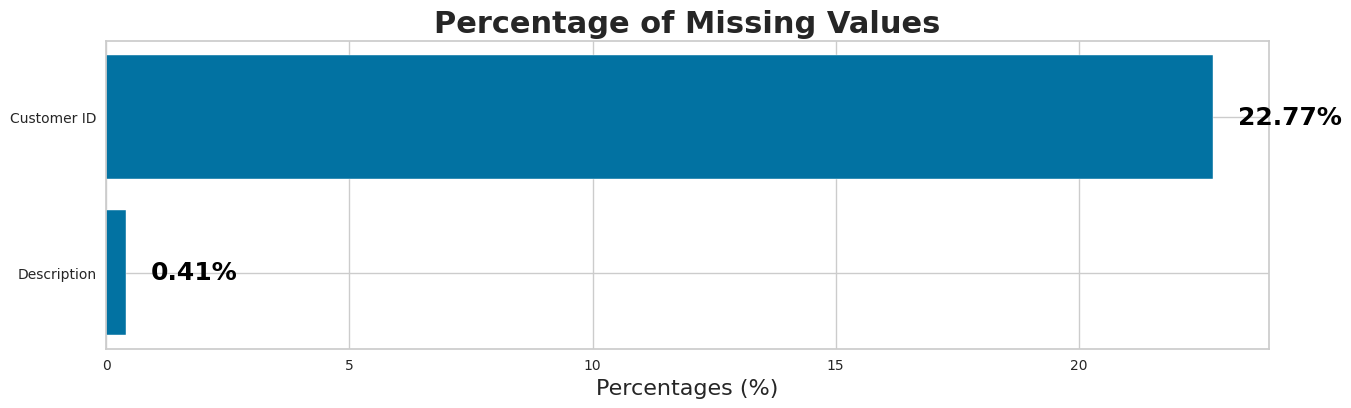

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage)
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

As we can see missing datas are in only 2 features. Since description has so low percentage missing values and CustomerID is unique key of dataset,dropping those missing values are better choice

In [ ]:
df=df.dropna(subset=['Customer ID', 'Description'])

In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


# **Duplicated Value Checking**

In [ ]:
df.duplicated().sum()

26479

In [ ]:
df.loc[df.duplicated(keep=False),:]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
362,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
367,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067136,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
1067150,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
1067153,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
1067160,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
df.drop_duplicates(inplace=True)

# **Exploratory Data Analysis**

In [ ]:

unique_stock_codes = df['StockCode'].nunique()


print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 4646


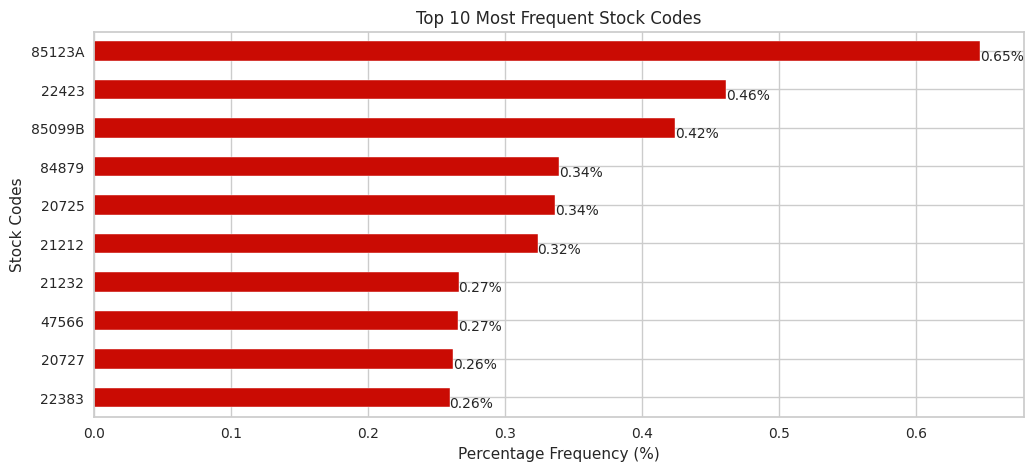

In [ ]:
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='r')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

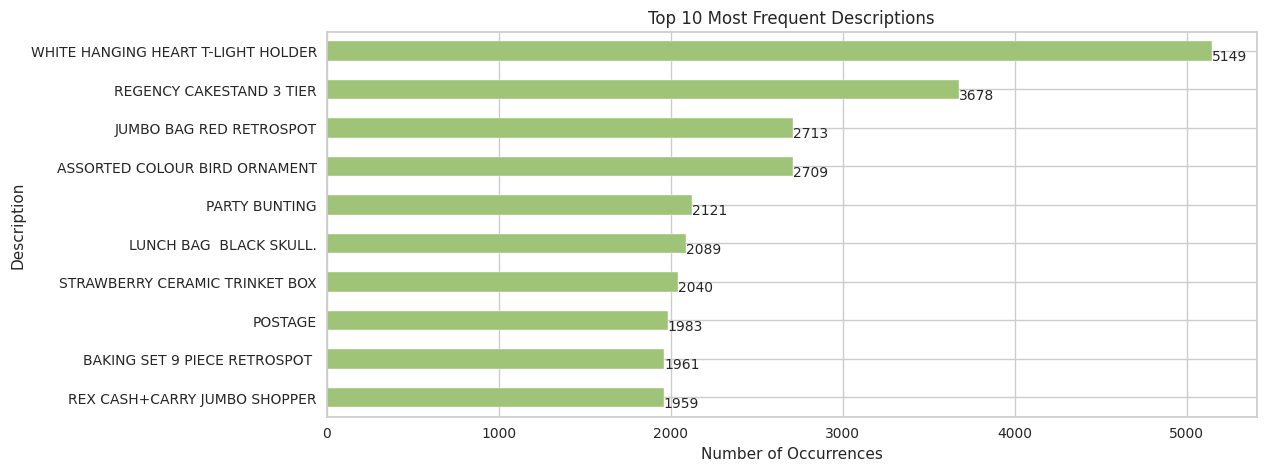

In [ ]:
top_10_description_codes = df['Description'].value_counts()[:10]

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_description_codes.plot(kind='barh', color='g')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_description_codes):
    plt.text(value, index+0.25, f'{value}', fontsize=10)

plt.title('Top 10 Most Frequent Descriptions')
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.gca().invert_yaxis()
plt.show()



# **CRM ANALYTICS**

In [ ]:
 df["InvoiceDate"]=df["InvoiceDate"].astype('object')

In [ ]:
df["InvoiceDate"].max()
today_date = dt.datetime(2011,12,11)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [ ]:
df["Invoice"].nunique()

44876

# **RFM Analysis**

RFM stands for **Recency**, **Frequency**, and **Monetary** value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.   

RFM factors illustrate these facts:

- The more recent the purchase, the more responsive the customer is to promotions
- The more frequently the customer buys, the more engaged and satisfied they are
- Monetary value differentiates heavy spenders from low-value purchasers


**Formulas:**

         Recency=today_date - InvoiceDate,
         Frequency=InvoiceNo.nunique()
         Monetary=Quantity * UnitPrice

In [ ]:



rfm = df.groupby('Customer ID').agg({ 'InvoiceDate' : lambda x : (today_date - x.max()).days,
                                    'Invoice': lambda x : x.nunique(),
                                    'Price': lambda x : x.sum()

})

In [ ]:
rfm.head()

,InvoiceDate,Invoice,Price
Customer ID,,,
12346.0,326,17,567.50
12347.0,3,8,554.57
12348.0,76,5,193.10
12349.0,19,5,1504.59
12350.0,311,1,65.30


In [ ]:
rfm["Total Price"]=rfm["Price"]

In [ ]:
rfm.drop("Price",axis=1,inplace=True)

In [ ]:
rfm.head()

,InvoiceDate,Invoice,Total Price
Customer ID,,,
12346.0,326,17,567.50
12347.0,3,8,554.57
12348.0,76,5,193.10
12349.0,19,5,1504.59
12350.0,311,1,65.30


In [ ]:
rfm.columns = ['recency', 'frequency', 'monetary']

In [ ]:
rfm.reset_index().head()

,Customer ID,recency,frequency,monetary
0,12346.0,326,17,567.50
1,12347.0,3,8,554.57
2,12348.0,76,5,193.10
3,12349.0,19,5,1504.59
4,12350.0,311,1,65.30


In [ ]:
rfm["recency_score"] = pd.qcut(rfm["recency"],5,labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method='first'),5,labels=[1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"],5,labels=[1,2,3,4,5])

In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
Customer ID,,,,,,
12346.0,326,17,567.50,2,5,4
12347.0,3,8,554.57,5,4,4
12348.0,76,5,193.10,3,3,3
12349.0,19,5,1504.59,5,3,5
12350.0,311,1,65.30,2,1,2


In [ ]:
rfm["RFM_SCORE"] =rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str)

In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346.0,326,17,567.50,2,5,4,25
12347.0,3,8,554.57,5,4,4,54
12348.0,76,5,193.10,3,3,3,33
12349.0,19,5,1504.59,5,3,5,53
12350.0,311,1,65.30,2,1,2,21


# **Segmentation Map**

In [ ]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

In [ ]:
rfm["segment"] = rfm["RFM_SCORE"].replace(seg_map,regex=True)

In [ ]:
rfm["segment"].value_counts()

,count
segment,
hibernating,1535
loyal_customers,1150
champions,856
at_Risk,752
potential_loyalists,741
about_to_sleep,380
need_attention,273
promising,116
cant_loose,85


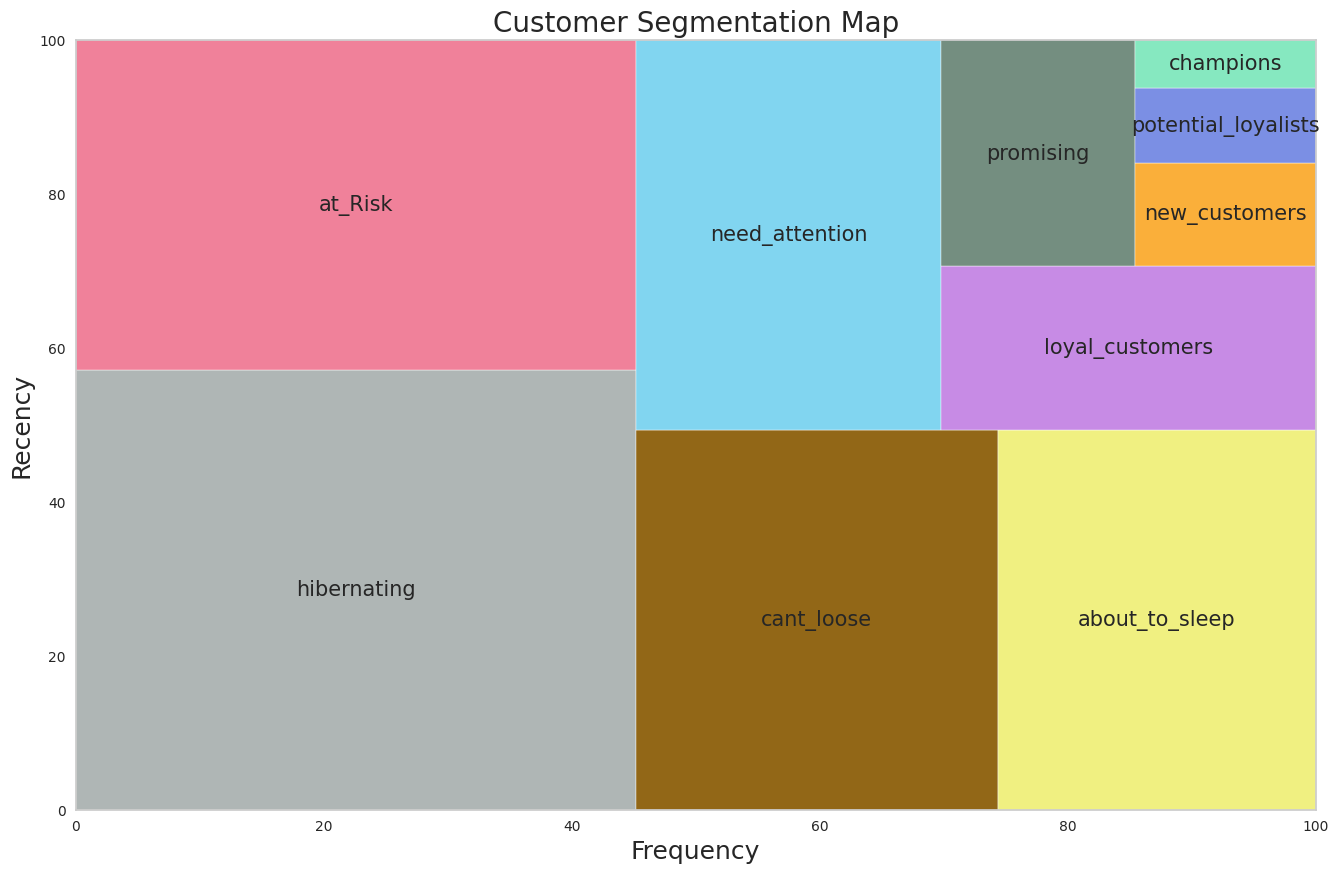

In [ ]:
segments = rfm["segment"].value_counts().sort_values(ascending=False)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
squarify.plot(
    sizes=segments,
    label=[label for label in seg_map.values()],
    color=[
        "#AFB6B5",
        "#F0819A",
        "#926717",
        "#F0F081",
        "#81D5F0",
        "#C78BE5",
        "#748E80",
        "#FAAF3A",
        "#7B8FE4",
        "#86E8C0",
    ],
    pad=False,
    bar_kwargs={"alpha": 1},
    text_kwargs={"fontsize": 15},
)
plt.title("Customer Segmentation Map", fontsize=20)
plt.xlabel("Frequency", fontsize=18)
plt.ylabel("Recency", fontsize=18)
plt.show()

By segmenting customers based on their RFM scores, we can develop targeted marketing strategies that address the specific needs and preferences of each segment. This approach not only improves customer satisfaction but also optimizes marketing expenditure by focusing resources on the most promising customer groups.

# **Model Evaluation**

In [ ]:
print(' RFM Model Evaluation '.center(70, '='))
X = rfm[['recency_score', 'frequency_score']]
labels = rfm['segment']
print(f'Number of Observations: {X.shape[0]}')
print(f'Number of Segments: {labels.nunique()}')
print(f'Silhouette Score: {round(silhouette_score(X, labels), 3)}')
print(f'Calinski Harabasz Score: {round(calinski_harabasz_score(X, labels), 3)}')
print(f'Davies Bouldin Score: {round(davies_bouldin_score(X, labels), 3)} \n{70*"="}')

======================== RFM Model Evaluation ========================
Number of Observations: 5942
Number of Segments: 10
Silhouette Score: 0.459
Calinski Harabasz Score: 6120.143
Davies Bouldin Score: 0.635 


# **Metrics Definitions:**

**Silhouette Coefficient or silhouette score:** It is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

**The Calinski and Harabasz score:**

It is also known as the Variance Ratio Criterion.

The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.


**The Davies-Bouldin score:**

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

# **Visualizations**

In [ ]:
rfm[['recency','monetary','frequency','segment']]\
.groupby('segment')\
.agg({'mean','count','max','min'})

recency                        monetary               \
                        min        mean count  max      min         mean   
segment                                                                    
about_to_sleep           60  108.689474   380  191     0.17    94.290795   
at_Risk                 192  377.094415   752  739     2.73   385.261915   
cant_loose              192  322.305882    85  611    92.74  1361.550259   
champions                 1    8.512850   856   19    18.00  1427.161945   
hibernating             192  466.237785  1535  739     0.00   119.760972   
loyal_customers          20   68.149565  1150  191     2.24   767.394970   
need_attention           60  114.395604   273  191     3.01   220.945278   
new_customers             1   10.814815    54   19     0.00    65.116481   
potential_loyalists       1   25.674764   741   59     0.83   208.372874   
promising                20   38.758621   116   59     0.39    59.036293   

                                    frequency                        
                    count       max       min       mean count  max  
segment                                                              
about_to_sleep        380   2033.10         1   1.460526   380    3  
at_Risk               752  33628.55         3   4.672872   752   10  
cant_loose             85  39920.95        10  17.717647    85  159  
champions             856  70473.10         5  23.532710   856  510  
hibernating          1535  25111.09         1   1.336808  1535    3  
loyal_customers      1150  40278.90         5  11.941739  1150  125  
need_attention        273   2524.18         3   3.673993   273    5  
new_customers          54    579.10         1   1.000000    54    1  
potential_loyalists   741  13255.22         1   2.967611   741    5  
promising             116    248.10         1   1.000000   116    1

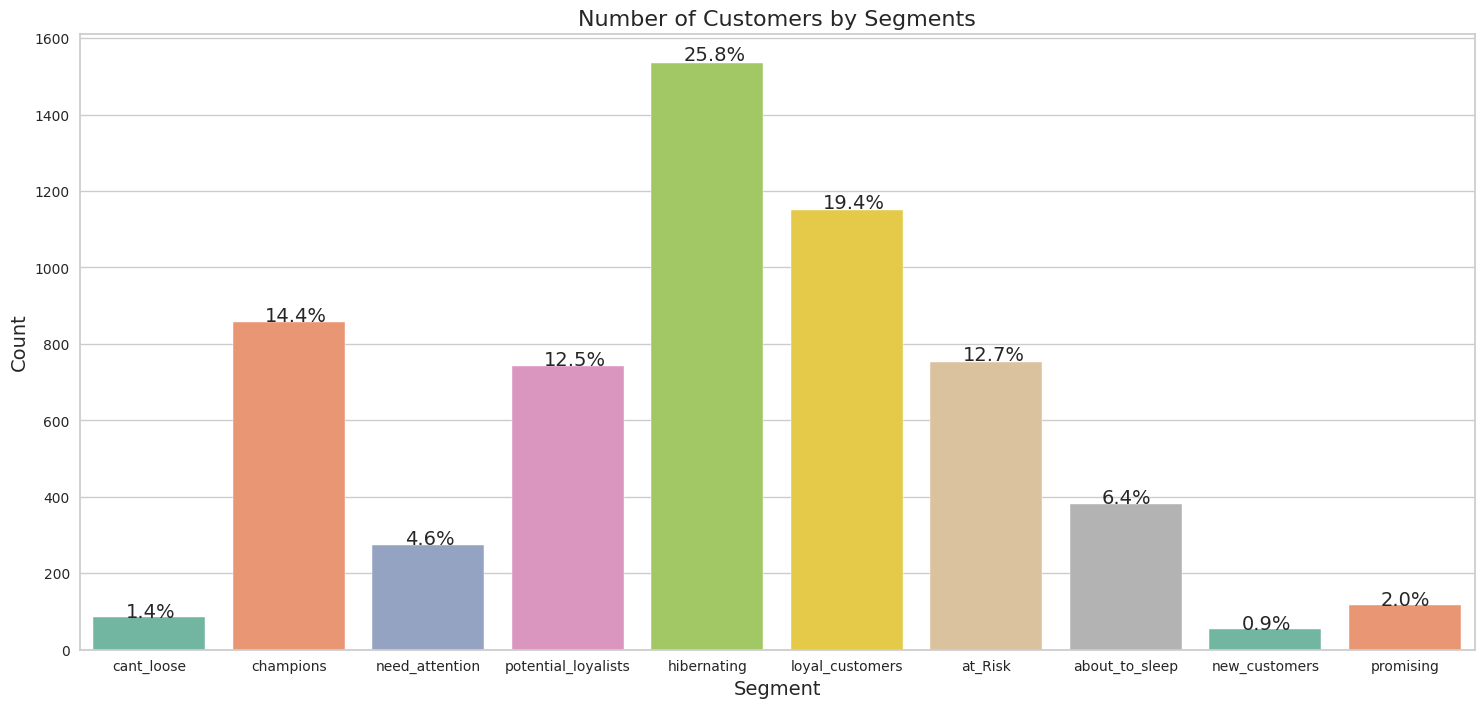

In [ ]:
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfm,
                   x = 'segment',
                   palette = palette)
total = len(rfm.segment)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

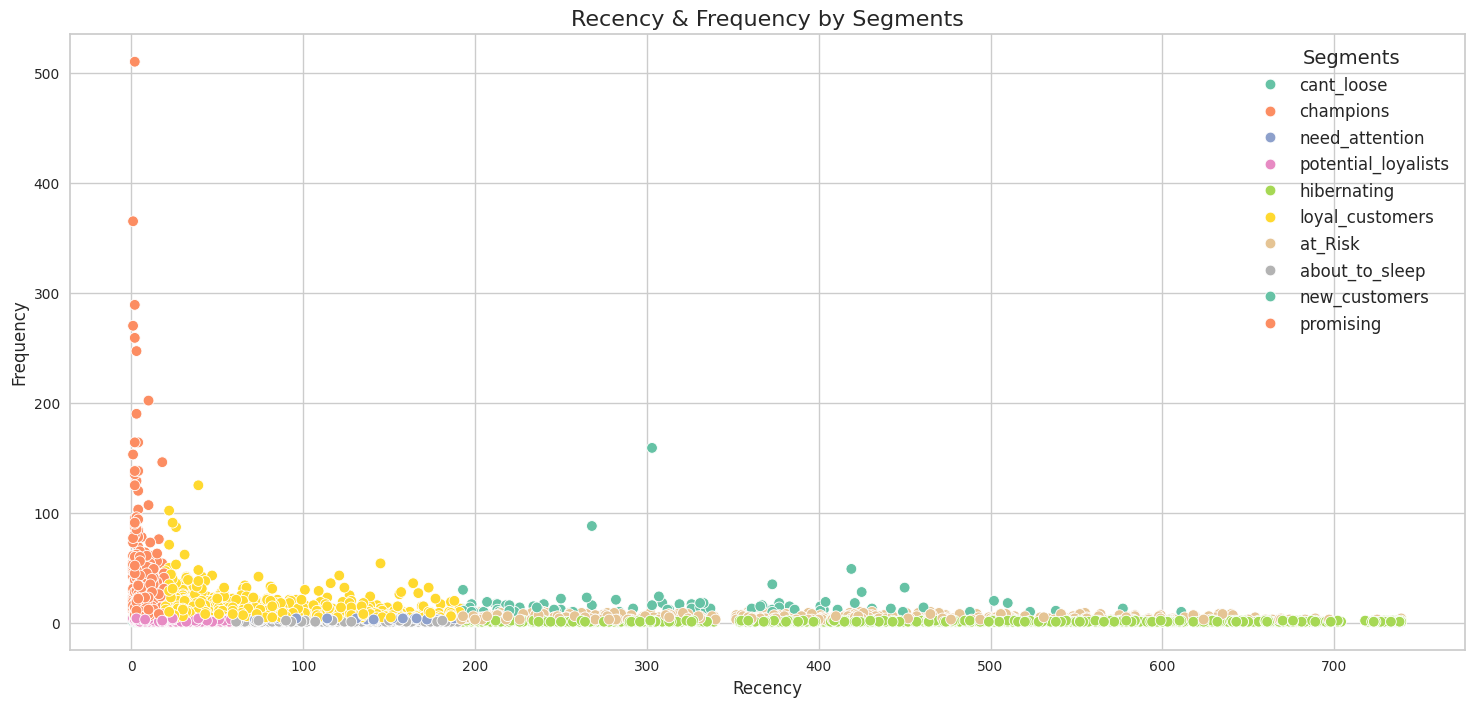

In [ ]:
plt.figure(figsize=(18, 8))
sns.scatterplot(
    data=rfm, x="recency", y="frequency", hue="segment", palette=palette, s=60
)
plt.title("Recency & Frequency by Segments", size=16)
plt.xlabel("Recency", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.legend(loc="best", fontsize=12, title="Segments", title_fontsize=14)
plt.show()

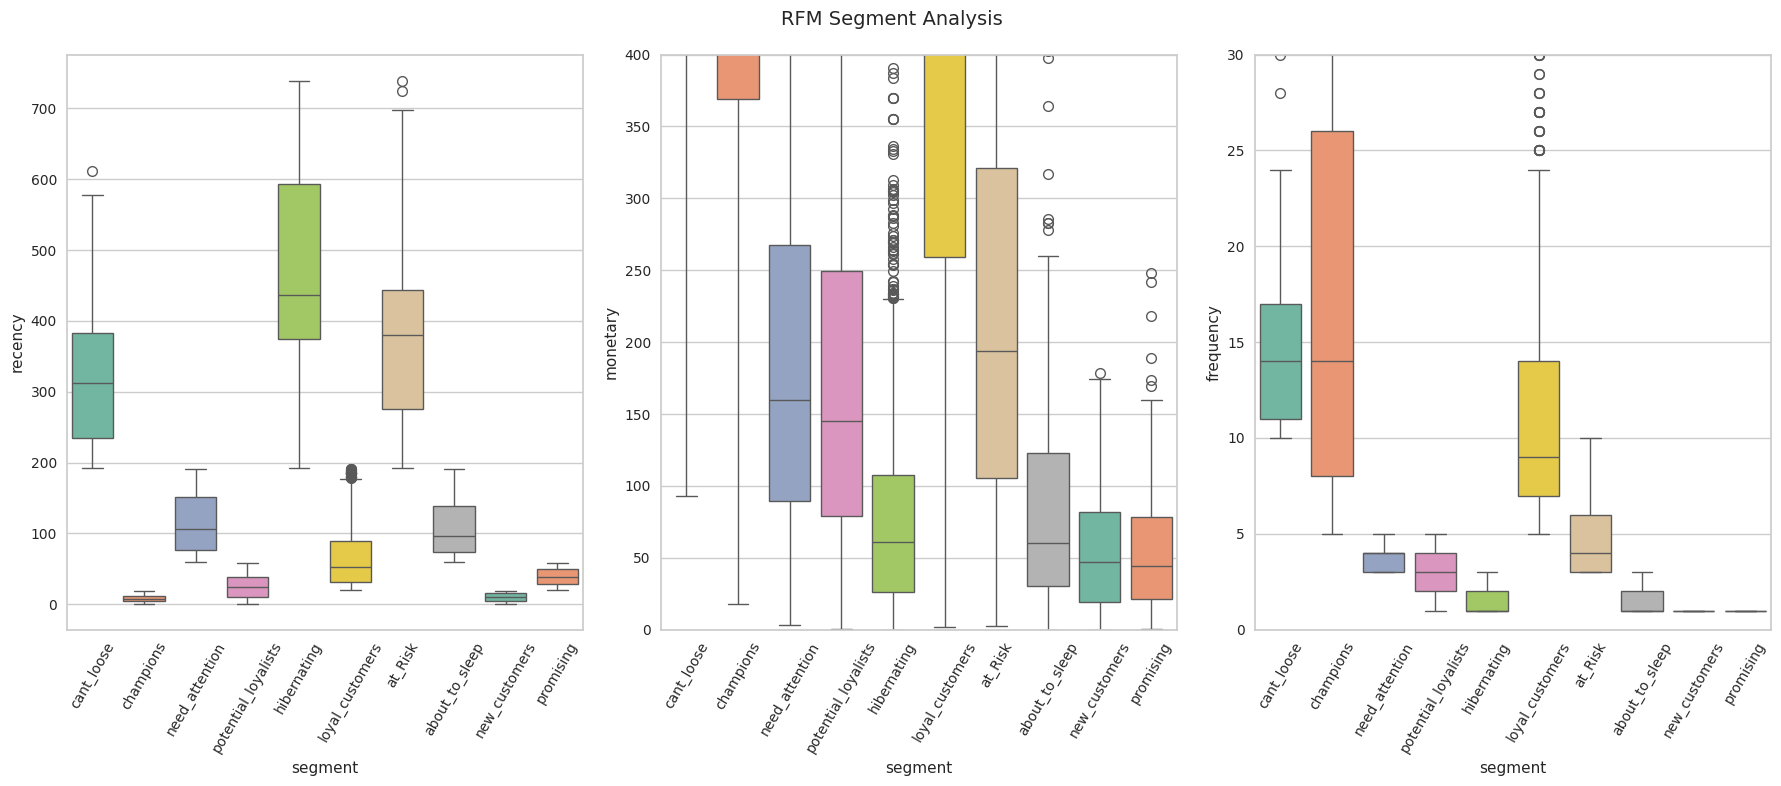

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))
fig.suptitle("RFM Segment Analysis", size=14)
feature_list = ["recency", "monetary", "frequency"]
for idx, col in enumerate(feature_list):
    sns.boxplot(
        ax=axes[idx], data=rfm, x="segment", y=feature_list[idx], palette=palette
    )
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=60)
    if idx == 1:
        axes[idx].set_ylim([0, 400])
    if idx == 2:
        axes[idx].set_ylim([0, 30])
plt.tight_layout()
plt.show()

- **Personalized Marketing Campaigns:** Use RFM segments to create personalized marketing campaigns that cater to the unique preferences of each customer group.
- **Loyalty Programs:** Develop loyalty programs that reward frequent purchasers and high-value customers to foster long-term loyalty and increase customer retention.
- **Promotional Strategies:** Design timely and relevant promotional strategies for customers who have recently interacted with the brand to boost engagement and conversion rates.

# **Customer Lifetime Value**

Customer Value = Purchase Frequency * Average Order Value

In [ ]:
cltv_df = df.groupby("Customer ID").agg(
    {
        "InvoiceDate": [
            lambda x: (x.max() - x.min()).days,
            lambda x: (today_date - x.min()).days,
        ],
        "Invoice": "nunique",
        "Price": "sum",
    }
)

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ["recency", "T", "frequency", "monetary"]
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.0,400,726,17,567.50
12347.0,402,405,8,554.57
12348.0,362,439,5,193.10
12349.0,716,736,5,1504.59
12350.0,0,311,1,65.30


**Recency:** Closest shopping date-first shopping date

**T:** Today's date- first shopping date

**Monetary:** Total Price

**Frequency:** Unique shopping times


In [ ]:
#Average Order Value
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

#Recency & Tenure
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

#Frequency
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

# **BG-NBD Model**

Beta Geometric / Negative Binomial Distribution known as BG-NBD Model. Also sometimes it comes up as “Buy Till You Die”. It gives us the conditional expected number of transactions in the next period. **This model can answer the following questions:**

How many transactions will be next week?


How many transactions will be in the next 3 months?


Which customers will do the most purchases in the next 2 weeks?


**This model models 2 processes by using probability for predicting the expected number of transactions:**

Transaction Process (Buy)= It has poisson gamma distribution.


Dropout Process (Till You Die)= It has beta distribution.


Parameters of model is decided by most likelihood estimation.

In [ ]:
BGF = BetaGeoFitter(penalizer_coef=0.001)

BGF.fit(cltv_df["frequency"], cltv_df["recency"], cltv_df["T"])

<lifetimes.BetaGeoFitter: fitted with 4481 subjects, a: 0.28, alpha: 7.73, b: 3.27, r: 1.53>

In [ ]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    #week
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,Customer ID,Expected Number of Transactions
0,14911.0,4.500468
1,12748.0,3.237174
2,17841.0,2.557064
3,15311.0,2.390216
4,14606.0,2.297772
5,13089.0,2.185147
6,14156.0,1.753671
7,14527.0,1.685545
8,14096.0,1.546466
9,13694.0,1.457846


In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

In [ ]:
cltv_df = cltv_df[cltv_df['monetary'] > 0]

In [ ]:
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 4481 subjects, p: 3.40, q: 0.65, v: 3.42>

In [ ]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    1, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,Customer ID,Expected Number of Transactions
0,14911.0,4.500468
1,12748.0,3.237174
2,17841.0,2.557064
3,15311.0,2.390216
4,14606.0,2.297772
5,13089.0,2.185147
6,14156.0,1.753671
7,14527.0,1.685545
8,14096.0,1.546466
9,13694.0,1.457846


In [ ]:
BGF.conditional_expected_number_of_purchases_up_to_time(
    4, cltv_df["frequency"], cltv_df["recency"], cltv_df["T"]
).sort_values(ascending=False).head(10).to_frame(
    "Expected Number of Transactions"
).reset_index()

,Customer ID,Expected Number of Transactions
0,14911.0,17.937584
1,12748.0,12.902318
2,17841.0,10.191737
3,15311.0,9.526779
4,14606.0,9.158244
5,13089.0,8.709397
6,14156.0,6.989706
7,14527.0,6.718151
8,14096.0,6.083293
9,13694.0,5.810564


# **Gamma-Gamma Model**

This model is used for predicting how much average profit we can earn for each customer. It gives us the expected average profit for each customer after modelling the average profit for the mass.

A customer’s monetary value (the sum of a customer’s transaction amounts) will be random distributed around the average of its transaction values


An average transaction value can change in periods between the customers but it's not changing for a customer


The average transaction value will be distributed gamma between all customers

In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

In [ ]:
cltv_df = cltv_df[cltv_df['monetary'] > 0]

In [ ]:
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 4481 subjects, p: 3.40, q: 0.65, v: 3.42>

In [ ]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])

In [ ]:
cltv_df.head()

,recency,T,frequency,monetary,expected_average_profit
Customer ID,,,,,
12346.0,57.142857,103.714286,17,33.382353,33.785468
12347.0,57.428571,57.857143,8,69.321250,70.645848
12348.0,51.714286,62.714286,5,38.620000,40.119252
12349.0,102.285714,105.142857,5,300.918000,307.855941
12352.0,50.857143,56.142857,13,174.284615,175.922268


In [ ]:
cltv_df["clv"] = ggf.customer_lifetime_value(BGF,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=3,
                                   freq="W",
                                   discount_rate=0.01)

In [ ]:
cltv_df = cltv_df.reset_index()
cltv_df.head()

,Customer ID,recency,T,frequency,monetary,expected_average_profit,clv
0,12346.0,57.142857,103.714286,17,33.382353,33.785468,0.218240
1,12347.0,57.428571,57.857143,8,69.321250,70.645848,124.621454
2,12348.0,51.714286,62.714286,5,38.620000,40.119252,41.755963
3,12349.0,102.285714,105.142857,5,300.918000,307.855941,215.011351
4,12352.0,50.857143,56.142857,13,174.284615,175.922268,469.368644


In [ ]:
cltv_df["cltv_segment"] = pd.qcut(cltv_df["clv"], 4, labels=["D", "C", "B", "A"])

In [ ]:
cltv_df.groupby("cltv_segment").agg({"count", "mean", "sum"})

Customer ID                           recency                \
                   count         sum          mean   count           sum   
cltv_segment                                                               
D                   1121  17167422.0  15314.381802    1121  27224.857143   
C                   1120  17275896.0  15424.907143    1120  63354.285714   
B                   1120  17073939.0  15244.588393    1120  72893.000000   
A                   1120  17044901.0  15218.661607    1120  70300.000000   

                            T                          frequency  ...  \
                   mean count           sum       mean     count  ...   
cltv_segment                                                      ...   
D             24.286224  1121  88975.000000  79.371097      1121  ...   
C             56.566327  1120  85394.428571  76.245026      1120  ...   
B             65.083036  1120  81980.857143  73.197194      1120  ...   
A             62.767857  1120  74545.714286  66.558673      1120  ...   

                        monetary                            \
                   mean    count            sum       mean   
cltv_segment                                                 
D              4.757360     1121   74380.820745  66.352204   
C              5.489286     1120   55344.187822  49.414453   
B              8.914286     1120   68163.151567  60.859957   
A             19.598214     1120  109480.621996  97.750555   

             expected_average_profit                             clv  \
                               count            sum       mean count   
cltv_segment                                                           
D                               1121   78107.115883  69.676285  1121   
C                               1120   58087.196305  51.863568  1120   
B                               1120   70525.452085  62.969154  1120   
A                               1120  111938.266196  99.944881  1120   

                                         
                        sum        mean  
cltv_segment                             
D               2976.098133    2.654860  
C              28358.401014   25.320001  
B              78336.522665   69.943324  
A             325688.521286  290.793323  

[4 rows x 21 columns]

In this project, we identified four customer segments (A, B, C, and D) based on the CLTV analysis. Here are the insights and recommendations for each segment:

**Segment A: High Value, High Engagement**

Characteristics:
- **High Recency:** Recent purchases.
- **High Frequency:** Frequent purchases.
- **High Monetary Value:** High spending.

**Segment B: Moderate Value, Moderate Engagement**

Characteristics:
- **Moderate Recency:** Fairly recent purchases.
- **Moderate Frequency:** Moderate purchase frequency.
- **Moderate Monetary Value:** Moderate spending.


**Segment C: Low Value, Low Engagement**

Characteristics:
- **Low Recency:** Less recent purchases.
- **Low Frequency:** Infrequent purchases.
- **Low Monetary Value:** Low spending.


**Segment D: New Customers**

Characteristics:
- **Recent Acquisition:** Newly acquired customers.
- **Undefined Frequency and Monetary Value:** Insufficient data to determine patterns.

# **Merge Dataset**

In [ ]:
cltv_df.head()

,Customer ID,recency,T,frequency,monetary,expected_average_profit,clv,cltv_segment
0,12346.0,57.142857,103.714286,17,33.382353,33.785468,0.218240,D
1,12347.0,57.428571,57.857143,8,69.321250,70.645848,124.621454,A
2,12348.0,51.714286,62.714286,5,38.620000,40.119252,41.755963,C
3,12349.0,102.285714,105.142857,5,300.918000,307.855941,215.011351,A
4,12352.0,50.857143,56.142857,13,174.284615,175.922268,469.368644,A


In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346.0,326,17,567.50,2,5,4,25,cant_loose
12347.0,3,8,554.57,5,4,4,54,champions
12348.0,76,5,193.10,3,3,3,33,need_attention
12349.0,19,5,1504.59,5,3,5,53,potential_loyalists
12350.0,311,1,65.30,2,1,2,21,hibernating


In [ ]:
merged_df = pd.merge(cltv_df, rfm, on='Customer ID', how='inner')
merged_df.head(10)

,Customer ID,recency_x,T,frequency_x,monetary_x,expected_average_profit,clv,cltv_segment,recency_y,frequency_y,monetary_y,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,57.142857,103.714286,17,33.382353,33.785468,0.218240,D,326,17,567.50,2,5,4,25,cant_loose
1,12347.0,57.428571,57.857143,8,69.321250,70.645848,124.621454,A,3,8,554.57,5,4,4,54,champions
2,12348.0,51.714286,62.714286,5,38.620000,40.119252,41.755963,C,76,5,193.10,3,3,3,33,need_attention
3,12349.0,102.285714,105.142857,5,300.918000,307.855941,215.011351,A,19,5,1504.59,5,3,5,53,potential_loyalists
4,12352.0,50.857143,56.142857,13,174.284615,175.922268,469.368644,A,37,13,2265.70,4,5,5,45,loyal_customers
5,12353.0,29.142857,58.428571,2,31.540000,35.029660,15.520737,C,205,2,63.08,2,2,2,22,hibernating
6,12355.0,50.428571,81.142857,2,53.715000,58.391043,22.663008,C,215,2,107.43,2,2,2,22,hibernating
7,12356.0,57.285714,60.714286,6,74.716667,76.583306,100.434034,B,23,6,448.30,4,4,4,44,loyal_customers
8,12357.0,50.714286,55.571429,3,611.436667,634.043285,527.673875,A,34,3,1834.31,4,2,5,42,potential_loyalists
9,12358.0,104.285714,104.571429,5,82.668000,85.080577,60.080237,B,2,5,413.34,5,3,4,53,potential_loyalists


In [ ]:
filtered_df = merged_df[(merged_df['cltv_segment'] == 'A') & (merged_df['segment'].isin(['need_attention','at_Risk']))]

In [ ]:
filtered_df

,Customer ID,recency_x,T,frequency_x,monetary_x,expected_average_profit,clv,cltv_segment,recency_y,frequency_y,monetary_y,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
118,12502.0,30.571429,44.285714,5,188.902000,193.517315,236.009031,A,96,5,944.51,3,3,5,33,need_attention
245,12669.0,15.000000,36.714286,4,631.045000,648.363585,357.787948,A,151,4,2524.18,3,3,5,33,need_attention
297,12739.0,45.000000,56.428571,4,181.730000,187.342349,178.600939,A,79,4,726.92,3,3,5,33,need_attention
409,12885.0,8.571429,17.714286,4,68.015000,70.664673,122.912001,A,64,4,272.06,3,3,4,33,need_attention
410,12886.0,21.571429,31.428571,3,107.356667,112.299139,134.272479,A,68,3,322.07,3,3,4,33,need_attention
587,13124.0,42.142857,55.142857,4,215.575000,222.069130,210.691777,A,90,4,862.30,3,3,5,33,need_attention
607,13151.0,60.571429,89.714286,5,172.890000,177.173310,107.856153,A,204,5,864.45,2,3,5,23,at_Risk
609,13154.0,84.428571,105.142857,5,185.860000,190.412239,121.630600,A,145,5,929.30,3,3,5,33,need_attention
657,13224.0,13.000000,21.714286,3,83.596667,87.706533,131.241821,A,61,3,250.79,3,3,4,33,need_attention
744,13344.0,29.857143,39.714286,3,196.033333,204.083244,210.353123,A,68,3,588.10,3,3,5,33,need_attention


# **Plotting**

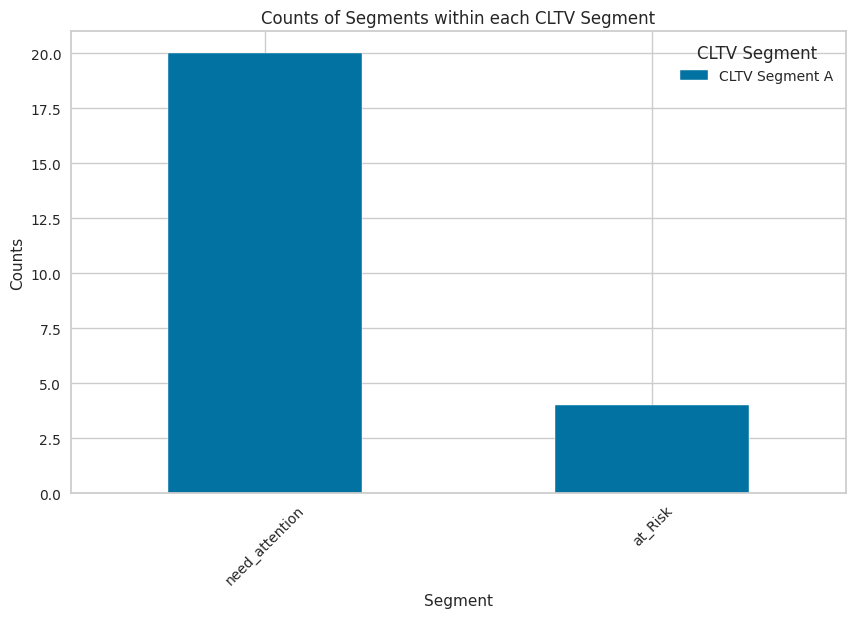

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Count plot for each cltv_segment
for cltv_segment in filtered_df['cltv_segment'].unique():
    subset = filtered_df[filtered_df['cltv_segment'] == cltv_segment]
    segment_counts = subset['segment'].value_counts()
    segment_counts.plot(kind='bar', ax=ax, label=f'CLTV Segment {cltv_segment}')

# Adding labels and title
ax.set_xlabel('Segment')
ax.set_ylabel('Counts')
ax.set_title('Counts of Segments within each CLTV Segment')
ax.legend(title='CLTV Segment')

# Display the plot
plt.xticks(rotation=45)
plt.show()

# **Customer Segmentation with K-Means**

In [ ]:
rfm_features = rfm[['recency', 'frequency', 'monetary']]

In [ ]:
sc = MinMaxScaler((0, 1))
rfm_features = sc.fit_transform(rfm_features)

In [ ]:
rfm_features

array([[0.4403794 , 0.03143418, 0.00805272],
       [0.00271003, 0.01375246, 0.00786924],
       [0.10162602, 0.00785855, 0.00274005],
       ...,
       [0.89430894, 0.        , 0.00142182],
       [0.64498645, 0.00392927, 0.00434989],
       [0.05691057, 0.01375246, 0.00495068]])

# **Optimum Number of Clusters**

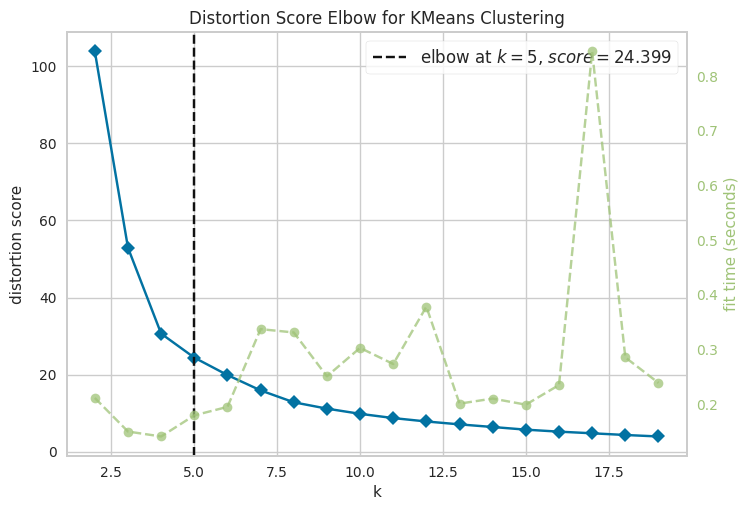

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(rfm_features)
elbow.show(block=True)

In [ ]:
elbow.elbow_value_

5

# **Model**

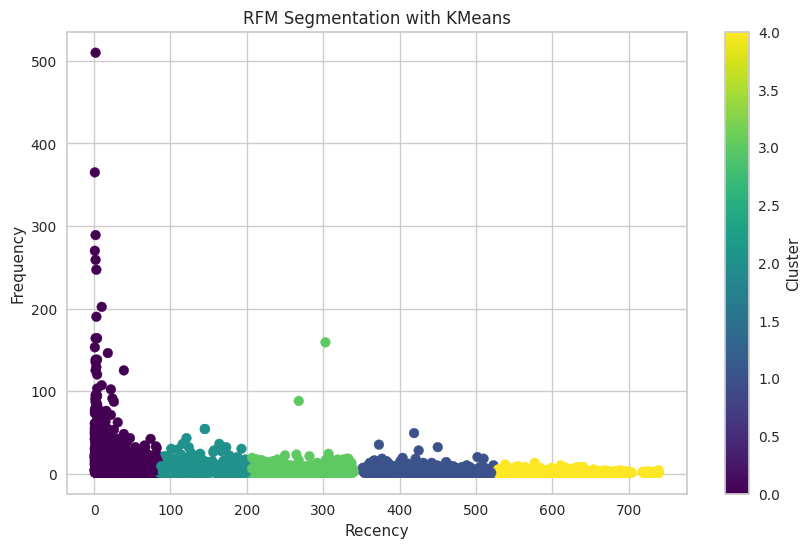

In [ ]:
kmeans = KMeans(n_clusters=elbow.elbow_value_)
rfm['cluster'] = kmeans.fit_predict(rfm_features)

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(rfm['recency'], rfm['frequency'], c=rfm['cluster'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Segmentation with KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
rfm_clusters_kmeans = kmeans.labels_

In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment,cluster
Customer ID,,,,,,,,,
12346.0,326,17,567.50,2,5,4,25,cant_loose,3
12347.0,3,8,554.57,5,4,4,54,champions,0
12348.0,76,5,193.10,3,3,3,33,need_attention,0
12349.0,19,5,1504.59,5,3,5,53,potential_loyalists,0
12350.0,311,1,65.30,2,1,2,21,hibernating,3


In [ ]:
rfm[['recency','monetary','frequency','cluster']]\
.groupby('cluster')\
.agg({'count','std','max','min'})

recency                     monetary                        \
               std  min count  max          std   min count       max   
cluster                                                                 
0        23.235139    1  2839   85  2227.852071  0.00  2839  70473.10   
1        43.954029  352  1047  524  1372.018543  0.29  1047  39920.95   
2        35.363588   83   791  202  1548.474293  0.17   791  40278.90   
3        38.179156  204   614  340   439.505748  0.55   614   7763.98   
4        63.028452  526   651  739  2123.739722  0.00   651  33628.55   

         frequency                 
               std min count  max  
cluster                            
0        21.651691   1  2839  510  
1         3.335817   1  1047   49  
2         5.856221   1   791   54  
3         8.026740   1   614  159  
4         1.492010   1   651   13

# **Visualization**

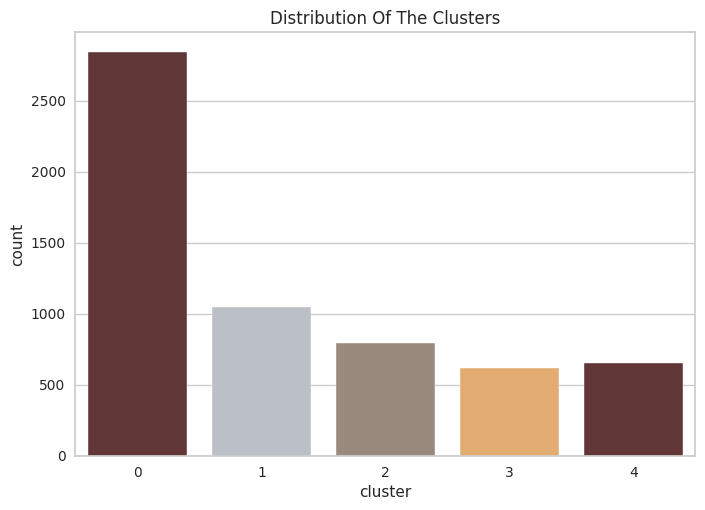

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=rfm["cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

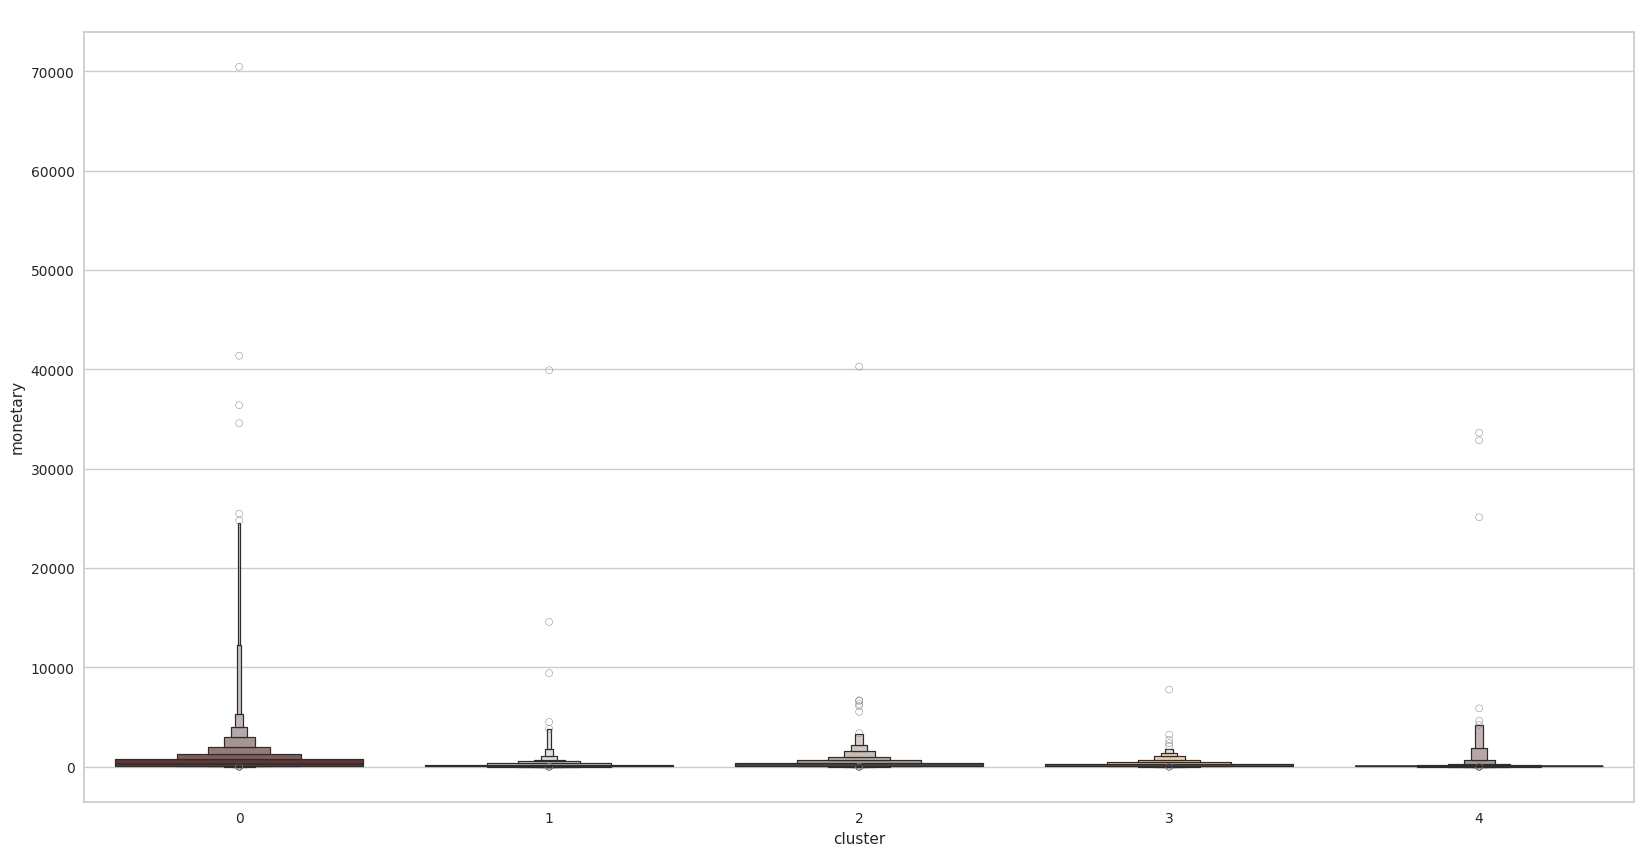

In [ ]:
plt.figure(figsize=(20, 10))
pl=sns.boxenplot(y=rfm["monetary"],x=rfm["cluster"], palette= pal)
pl.set_title("  ")
plt.show()